In [ ]:
# This file is for plotting loss and accuracy over epoch and find number of parameters

In [21]:
import json
from matplotlib import pyplot as plt
import numpy as np
import torch

from model.res3net_k533 import Res3NetK533, BasicBlock3

In [22]:
with open('res3netk533/stats2.json') as fp:
    stats = json.load(fp)
model = Res3NetK533(BasicBlock3)
total_params = sum(p.numel() for p in model.parameters())
print(f"Total Parameters: {total_params}")

Total Parameters: 4752586


tensor(50000.)


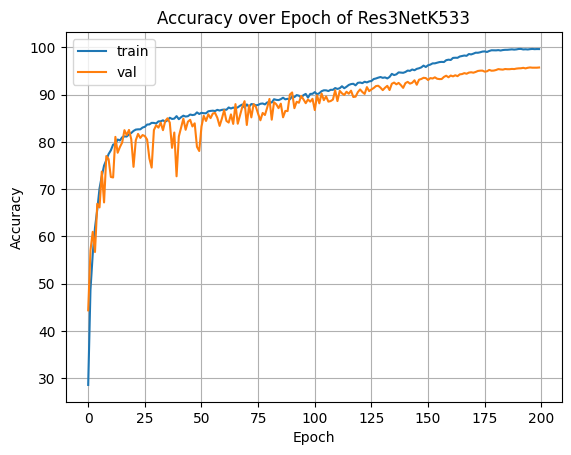

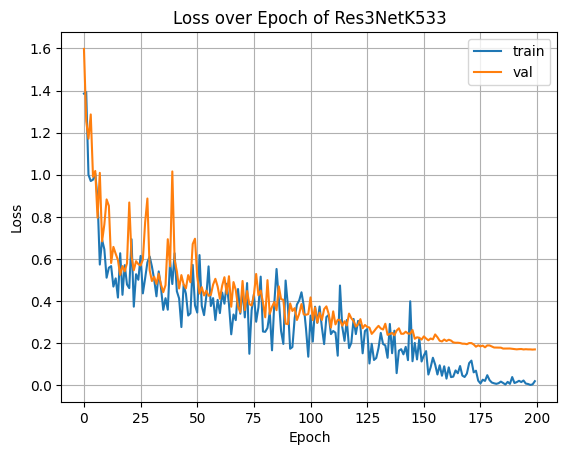

In [23]:
train_acc = stats['train_acc']
train_loss = stats['train_losses']
val_acc = stats['valid_acc']
val_loss = stats['valid_losses']
res = []
mul = torch.ones((391,))*128
mul[-1] = 80
print(sum(mul))
for i in range(200):
    cur = torch.tensor(train_acc[391*i:391*i+391])
    avg = sum(cur*mul)/50000
    res.append(avg)

plt.plot(np.linspace(0,199,num=200), res, label='train')
plt.plot(np.linspace(0,199,num=200), val_acc, label='val')
plt.legend()
plt.title('Accuracy over Epoch of Res3NetK533')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

plt.figure()
plt.plot(np.linspace(0,199,num=200), train_loss, label='train')
plt.plot(np.linspace(0,199,num=200), val_loss, label='val')
plt.legend()
plt.title('Loss over Epoch of Res3NetK533')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()
